In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [16]:
from google.colab import files
uploaded = files.upload()

Saving GSS.csv to GSS.csv


In [71]:
data = pd.read_csv('GSS.csv')
df = pd.DataFrame(data)
df.head(5)

,year,id_,marital,divorce,sibs,childs,born,parborn
0,1972,1,Never married,.i: Inapplicable,3,0,.i: Inapplicable,.i: Inapplicable
1,1972,2,Married,NO,4,5,.i: Inapplicable,.i: Inapplicable
2,1972,3,Married,NO,5,4,.i: Inapplicable,.i: Inapplicable
3,1972,4,Married,NO,5,0,.i: Inapplicable,.i: Inapplicable
4,1972,5,Married,NO,2,2,.i: Inapplicable,.i: Inapplicable


In my opinion the most interseting aspect of the GSS data is how old it is. The reasoning behind all of my variable selections were made with the goal of analyzing how they have shifted over time. I'm interested in the U.S. as a whole and seeing which parts of life have changed and how. Firstly, I obviously chose year because this is what I mostly want to compare the other variables to. Next I went with martial status and divorce. While I don't know for certain whether these have changed, I have a feeling that there will be an upward trend in unmarried and divorced respondents as it seems our world has moved this way in the last 50 years. Another pair of variables are siblings and children which I suspect will both show a decline over time. Finally, I am unsure about the born in U.S. and parents born in U.S. variables. They seem related and I also want to compare how these have shifted from the 70s to today.

['Never married' 'Married' 'Divorced' 'Widowed' 'Separated'
 '.n:  No answer' '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose']


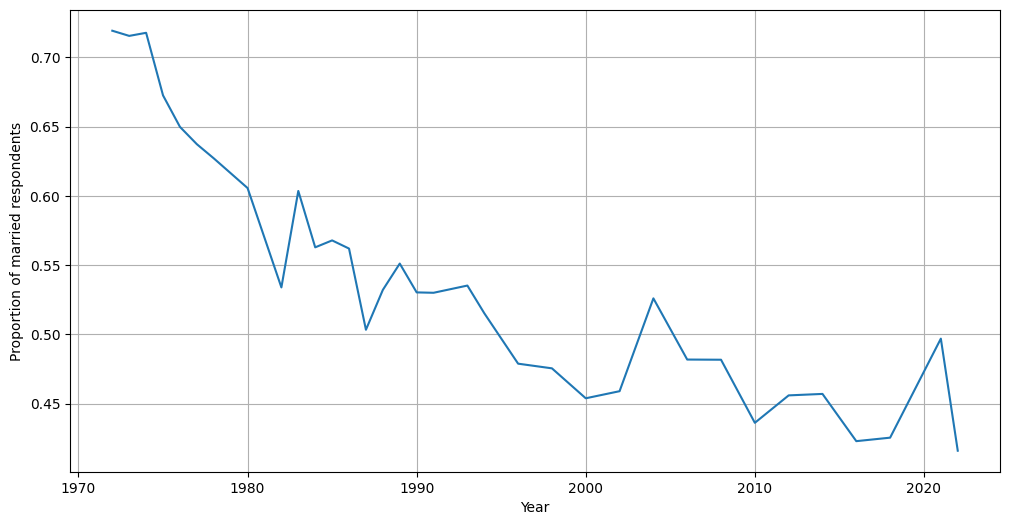

In [56]:
# Martial Status over time. I will look at proportion of respondents who claimed Married status for each year.

# I want to see how many unique values exist for this column
print(df['marital'].unique())

# Now I want to narrow the column down to just responses that matter to us
valid_marital_statuses = ['Never married', 'Married', 'Divorced', 'Widowed', 'Separated']
df = df[df['marital'].isin(valid_marital_statuses)]

# Crosstabulate year and marital status
marital_counts = pd.crosstab(df['year'], df['marital'])

# Calculate the proportion of Married responses for each year
marital_proportions = marital_counts['Married'] / marital_counts.sum(axis=1)

# Plot  vs married status
plt.figure(figsize=(12,6))
plt.plot(marital_proportions.index, marital_proportions.values)
plt.xlabel("Year")
plt.ylabel("Proportion of married respondents")
plt.grid()
plt.show()

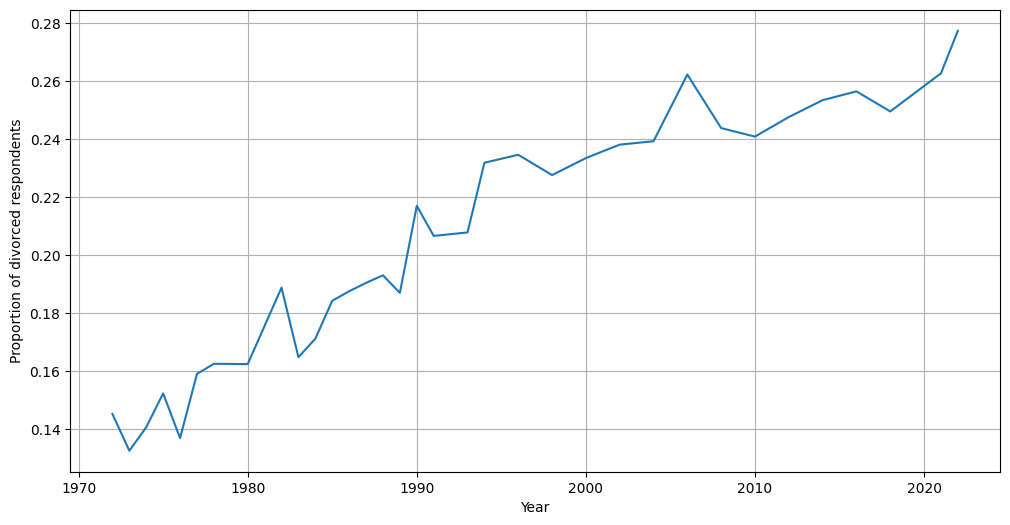

In [57]:
# I will now follow all the same steps for the divorce variable
valid_divorce = ['YES', 'NO']
df = df[df['divorce'].isin(valid_divorce)]
divorce_counts = pd.crosstab(df['year'], df['divorce'])
divorce_proportions = divorce_counts['YES'] / divorce_counts.sum(axis=1)

# Plot
plt.figure(figsize=(12,6))
plt.plot(divorce_proportions.index, divorce_proportions.values)
plt.xlabel("Year")
plt.ylabel("Proportion of divorced respondents")
plt.grid()
plt.show()

As I suspected, the proportion of married respondents has been on the dcrease and the proportion of divorced respondents has been increasing. I see some interesting trends. One of which is the spike in married statuses in the early to mid-2000s. This is followed by a slightly delayed spike in divorced statuses. This makes it seem like all of those marriages ended shortly after for whatever reason, although this is impossible to actually know from the data. I also notice a steep incline in divorced statuses right after 2020 which I suspect could be a result of the pandemic driving apart marriages. There is a corresponding drop in married statuses which could indicate the same occurance.

[  4.   5.   2.   7.   6.   0.   1.   3.  nan   9.  11.  12.   8.  10.
  14.  13.  16.  15.  18.  20.  27.  17.  19.  31.  21.  26.  22.  23.
  68.  24.  30.  25.  32.  33.  34.  29.  55.  43. -97.  28.]


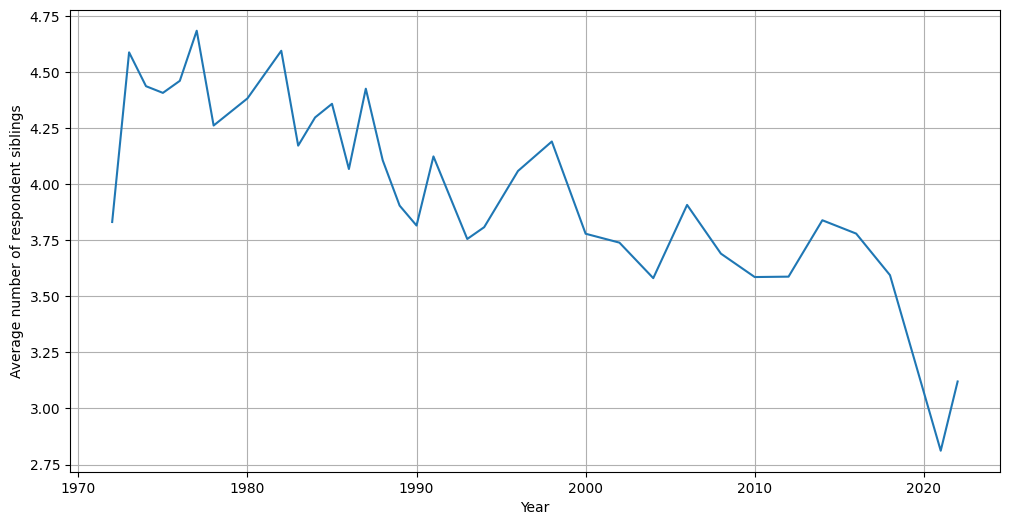

In [61]:
# Next I will look at siblings and children of the respondents to see if the trends match my predictions.

# Check values
print(df['sibs'].unique())

# Convert civlings to numeric since it is currently in string form
df['sibs'] = pd.to_numeric(df['sibs'], errors='coerce')

# Group by year and calculate the mean number of siblings per year
sibs_mean = df.groupby('year')['sibs'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(sibs_mean.index, sibs_mean.values)
plt.xlabel("Year")
plt.ylabel("Average number of respondent siblings")
plt.grid()
plt.show()

['5' '4' '0' '2' '1' '3' '8 or more' '7' '6'
 '.d:  Do not Know/Cannot Choose' '.n:  No answer' '.i:  Inapplicable'
 '.s:  Skipped on Web']


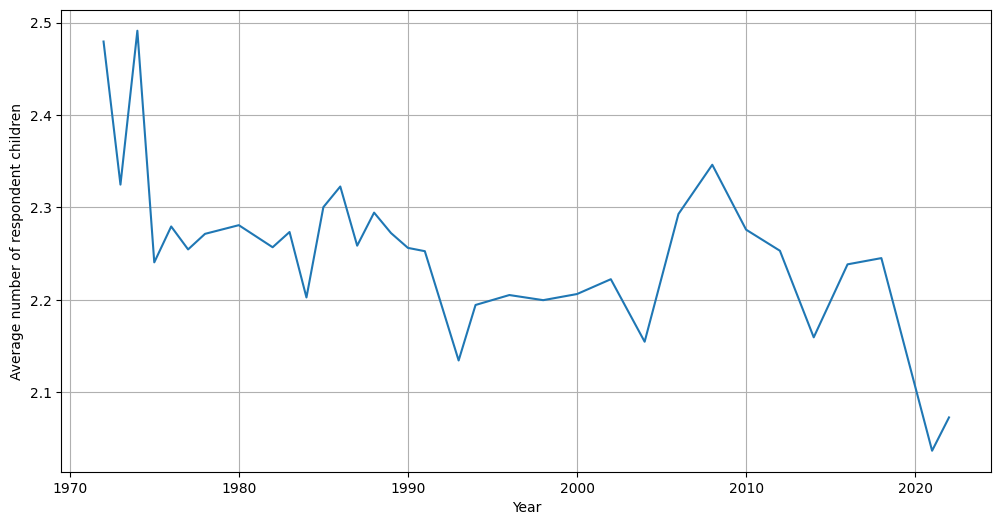

In [63]:
# Now for children using the same exact process as with siblings
print(df['childs'].unique())
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')
childs_mean = df.groupby('year')['childs'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(childs_mean.index, childs_mean.values)
plt.xlabel("Year")
plt.ylabel("Average number of respondent children")
plt.grid()
plt.show()

My predictions, again, appear to be correct in that siblings and children will be on the decline. While there is certainly variation which each variable, the end value is much lower than the starting in both cases. One spot of interest is in the mid 2000s which began a spike in average children. This is when I was born so it is interesting to see such an increase in average number of children which implies there were more new parents during this time.

['YES' 'NO']


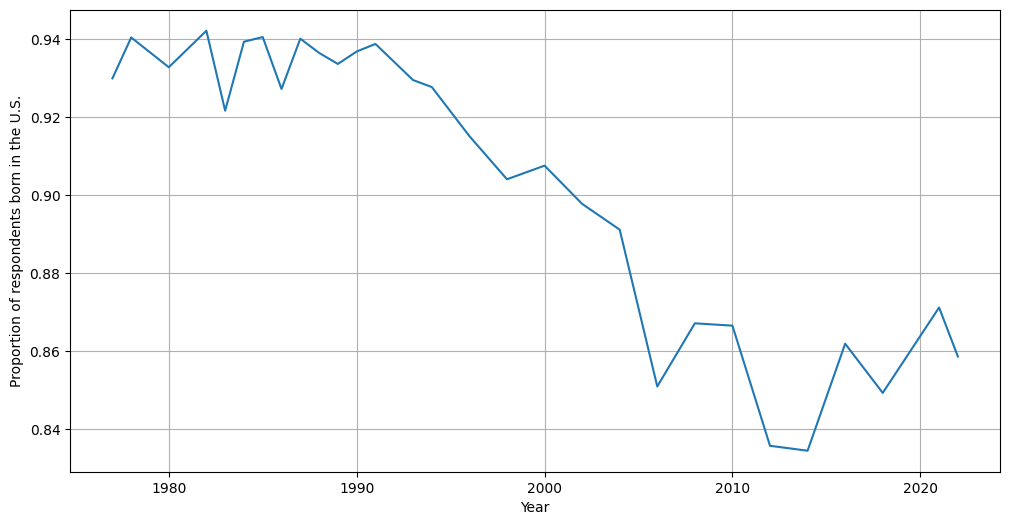

In [66]:
# Finally, I will look at born and parents born parameters which indicate respectively whether you or your parents were born in the U.S.
# I am using the same process as I did with marital/divorce status

print(df['born'].unique())

valid_born = ['YES', 'NO']
df = df[df['born'].isin(valid_born)]
born_counts = pd.crosstab(df['year'], df['born'])
born_proportions = born_counts['YES'] / born_counts.sum(axis=1)

# Plot
plt.figure(figsize=(12,6))
plt.plot(born_proportions.index, born_proportions.values)
plt.xlabel("Year")
plt.ylabel("Proportion of respondents born in the U.S.")
plt.grid()
plt.show()

['Neither born in the U.S.' 'Both born in the U.S.'
 'Mother yes, father no' 'Mother no, father yes'
 "Mother don't know, father don't know" "Mother yes, father don't know"
 "Mother no, father don't know" "Mother don't know, father no"
 "Mother don't know, father yes"]


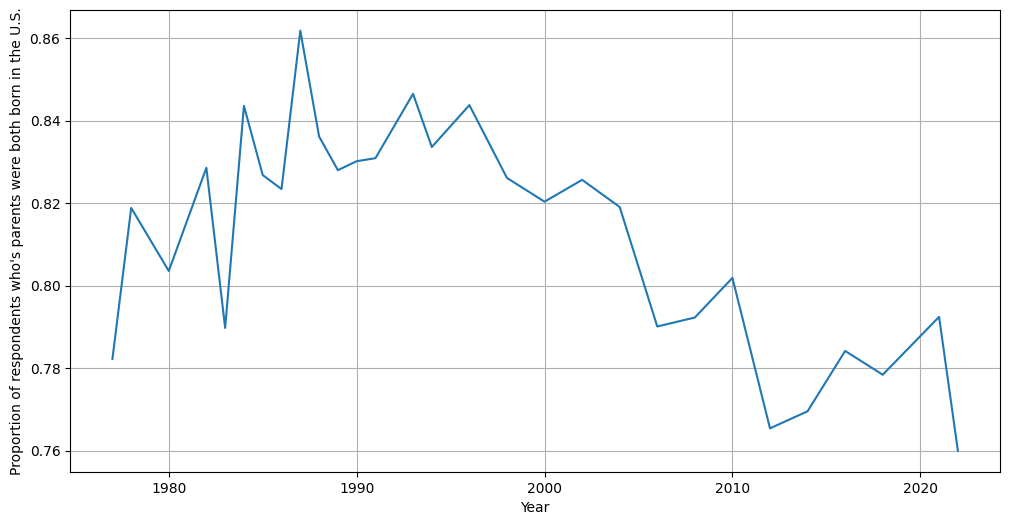

In [77]:
# Now for parents born
print(df['parborn'].unique())

# I am going to look at the 'Both born in the U.S.' value\
valid_parborn = ['Neither born in the U.S.', 'Both born in the U.S.', 'Mother yes, father no', 'Mother no, father yes', 'Mother yes, father don\'t know', 'Mother don\'t know, father don\'t know', 'Mother no, father don\'t know', 'Mother don\'t know, father no', 'Mother don\'t know, father yes']
df = df[df['parborn'].isin(valid_parborn)]
parborn_counts = pd.crosstab(df['year'], df['parborn'])
parborn_proportions = parborn_counts['Both born in the U.S.'] / parborn_counts.sum(axis=1)

# Plot
plt.figure(figsize=(12,6))
plt.plot(parborn_proportions.index, parborn_proportions.values)
plt.xlabel("Year")
plt.ylabel("Proportion of respondents who's parents were both born in the U.S.")
plt.grid()
plt.show()

Since I wasn't entirely sure which way these variables would move, these plots helped me figure out the general trend. We see a decline in the born variable which was relatively flat to start, then took a dive from the early 90s to around 2006, and then it has started to level out or even creep back up. The parents born variable is interesting in that it increased from the 70s to its peak in the late 80s and then it has pretty steadily declined since. I would have assumed that these 2 variables would follow relatively similar trends. This certainly gives us some insight into the relationship between US born people and their parents.